<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/MINST-Digits-Classification/blob/main/CNN_MINST_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import math
import cv2

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [5]:
ohe = OneHotEncoder()
y_train_ohe = ohe.fit_transform(y_train.reshape(-1,1)).toarray()
y_test_ohe = ohe.transform(y_test.reshape(-1,1)).toarray()

In [6]:
y_train_ohe.shape

(60000, 10)

In [7]:
model = Sequential([
    Conv2D(10,(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu', name='L2'),
    Dense(32, activation='relu', name='L3'),
    Dense(10, activation='softmax', name='L4')
], name='my_model')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam())

In [9]:
model.fit(x_train, y_train_ohe, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.4209
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0775
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0527
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0344
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.0266
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.0242
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0178
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0139
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0108
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0099
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0086
Epoch 12/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.0062
Epoch 13/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0056
Epoch 14/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0050
Epoch 15/20
187

In [10]:
output = model.evaluate(x_test, y_test_ohe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1009


In [11]:
output

0.07972655445337296

In [12]:
y_pred = model.predict(x_test)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[4.27831725e-15 5.04418176e-13 1.40141510e-11 ... 9.99999940e-01
  5.97660772e-15 5.97915717e-09]
 [1.06029221e-14 5.69330716e-09 9.99999940e-01 ... 3.65843776e-13
  1.70617561e-18 1.31198705e-20]
 [1.58289493e-10 9.99999464e-01 2.78115621e-11 ... 2.24038441e-08
  2.13251585e-08 3.98435311e-08]
 ...
 [1.92143923e-18 1.79106303e-15 2.41005358e-17 ... 5.33513424e-12
  1.21046185e-11 4.70956121e-15]
 [1.24684690e-15 5.61491647e-18 2.88050139e-20 ... 3.50770498e-22
  1.17229092e-06 4.64838380e-17]
 [4.46644071e-18 6.04149420e-25 1.48467842e-16 ... 2.35274357e-32
  1.24277953e-14 9.34437612e-24]]


In [13]:
print(np.argmax(y_pred, axis=1))
print(accuracy_score(np.argmax(y_pred, axis=1), y_test))

[7 2 1 ... 4 5 6]
0.9852


In [19]:
own_images = []

for i in range(0,10):
  own_images.append(f'/content/{i}a.png')
  own_images.append(f'/content/{i}b.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Digit: 0


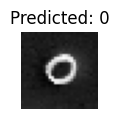

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Digit: 1


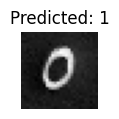

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Digit: 2


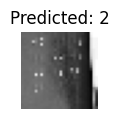

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Digit: 1


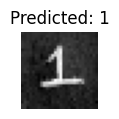

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Digit: 1


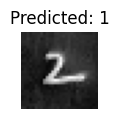

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Digit: 1


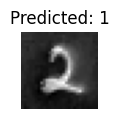

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Digit: 1


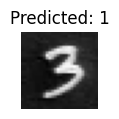

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Digit: 1


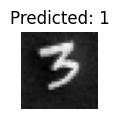

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Digit: 4


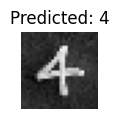

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Digit: 4


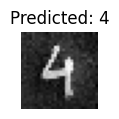

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Digit: 1


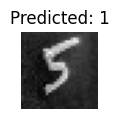

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Digit: 1


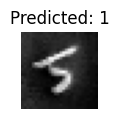

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Digit: 6


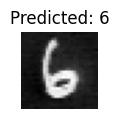

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Digit: 6


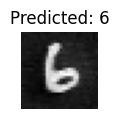

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Digit: 1


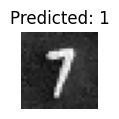

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Digit: 1


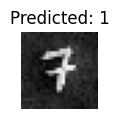

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Digit: 1


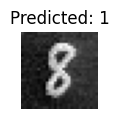

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Digit: 1


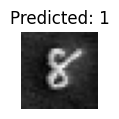

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Digit: 1


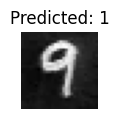

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Digit: 1


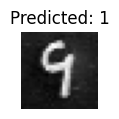

In [25]:
sample_inputs = []

for i in range(len(own_images)):
  img = cv2.imread(own_images[i], cv2.IMREAD_GRAYSCALE)
  img_resized = cv2.resize(img, (28, 28))
  img_inverted = 255 - img_resized
  img_normalized = img_inverted / 255.0
  img_input = img_normalized.reshape(1, 28, 28, 1)
  sample_inputs.append(img_input)
  # === Predict the digit ===
  prediction = model.predict(img_input)
  predicted_digit = np.argmax(prediction)
  print("Predicted Digit:", predicted_digit)
  plt.figure(figsize=(1,1))
  plt.imshow(img_normalized, cmap='gray')
  plt.title(f"Predicted: {predicted_digit}")
  plt.axis('off')
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[0] Predicted Digit: 9


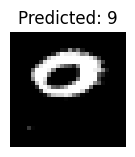

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[1] Predicted Digit: 0


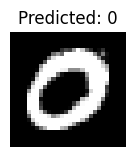

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[2] Predicted Digit: 7


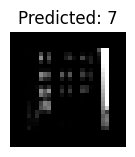

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[3] Predicted Digit: 1


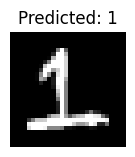

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[4] Predicted Digit: 2


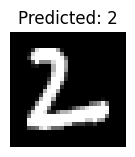

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[5] Predicted Digit: 2


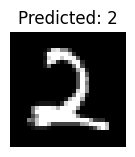

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[6] Predicted Digit: 3


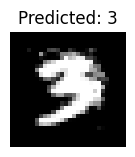

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[7] Predicted Digit: 3


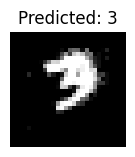

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[8] Predicted Digit: 4


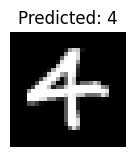

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[9] Predicted Digit: 4


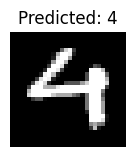

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[10] Predicted Digit: 5


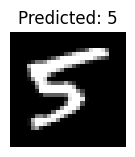

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[11] Predicted Digit: 5


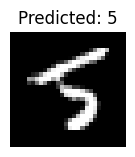

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[12] Predicted Digit: 6


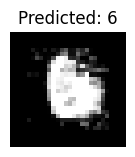

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[13] Predicted Digit: 0


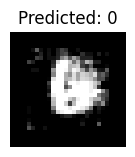

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[14] Predicted Digit: 3


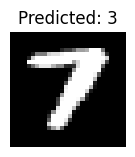

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[15] Predicted Digit: 3


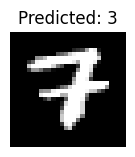

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[16] Predicted Digit: 8


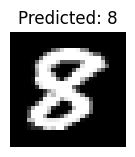

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[17] Predicted Digit: 8


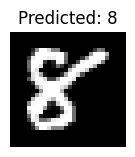

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[18] Predicted Digit: 4


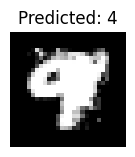

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[19] Predicted Digit: 4


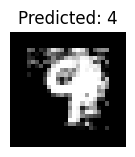

In [27]:
sample_inputs = []

for i in range(len(own_images)):
    img = cv2.imread(own_images[i], cv2.IMREAD_GRAYSCALE)
    img = 255 - img
    _, img_thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    coords = cv2.findNonZero(img_thresh)
    x, y, w, h = cv2.boundingRect(coords)
    img_cropped = img_thresh[y:y+h, x:x+w]
    img_resized = cv2.resize(img_cropped, (20, 20), interpolation=cv2.INTER_AREA)
    img_padded = np.pad(img_resized, ((4, 4), (4, 4)), mode='constant', constant_values=0)
    img_normalized = img_padded / 255.0
    img_input = img_normalized.reshape(1, 28, 28, 1).astype('float32')
    sample_inputs.append(img_input)
    prediction = model.predict(img_input)
    predicted_digit = np.argmax(prediction)

    # === Display the prediction ===
    print(f"[{i}] Predicted Digit: {predicted_digit}")
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(img_normalized, cmap='gray')
    plt.title(f"Predicted: {predicted_digit}")
    plt.axis('off')
    plt.show()
